In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("../data/features.csv")

In [4]:
print(df.shape)
print(df.dtypes)


(3497, 16)
userWallet                      object
amount_count                     int64
amount_sum                     float64
amount_mean                    float64
amount_max                     float64
usd_value_sum                  float64
usd_value_mean                 float64
datetime_min                    object
datetime_max                    object
action_deposit_sum               int64
action_borrow_sum                int64
action_repay_sum                 int64
action_redeemunderlying_sum      int64
action_liquidationcall_sum       int64
active_days                      int64
deposit_borrow_ratio           float64
dtype: object


In [5]:
print(df.isnull().sum())

userWallet                     0
amount_count                   0
amount_sum                     0
amount_mean                    0
amount_max                     0
usd_value_sum                  0
usd_value_mean                 0
datetime_min                   0
datetime_max                   0
action_deposit_sum             0
action_borrow_sum              0
action_repay_sum               0
action_redeemunderlying_sum    0
action_liquidationcall_sum     0
active_days                    0
deposit_borrow_ratio           0
dtype: int64


In [6]:
df.describe()

,amount_count,amount_sum,amount_mean,amount_max,usd_value_sum,usd_value_mean,action_deposit_sum,action_borrow_sum,action_repay_sum,action_redeemunderlying_sum,action_liquidationcall_sum,active_days,deposit_borrow_ratio
count,3497.000000,3.497000e+03,3.497000e+03,3.497000e+03,3.497000e+03,3.497000e+03,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000,3497.000000
mean,28.595939,1.871546e+23,2.676293e+21,1.668780e+22,3.337471e+23,6.056385e+21,10.811553,4.885902,3.589648,9.237918,0.070918,22.593080,2.164524
std,250.732075,4.074822e+24,4.548414e+22,2.648046e+23,5.079090e+24,8.274197e+22,29.868997,15.133573,13.374770,242.518307,0.692889,33.174518,6.393407
min,1.000000,2.900000e+01,2.900000e+01,2.900000e+01,9.236938e+01,9.236938e+01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.000000,9.499274e+13,3.661972e+12,1.000000e+13,2.404744e+14,1.588137e+13,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.000000,1.620000e+18,1.000000e+18,1.330000e+18,4.981201e+18,1.802931e+18,2.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000
75%,16.000000,1.604850e+21,8.631680e+19,6.174478e+20,4.256143e+21,2.712864e+20,6.000000,3.000000,2.000000,3.000000,0.000000,33.000000,2.000000
max,14265.000000,1.756775e+26,2.057674e+24,1.273000e+25,1.912249e+26,2.501390e+24,511.000000,200.000000,291.000000,14265.000000,26.000000,154.000000,139.000000


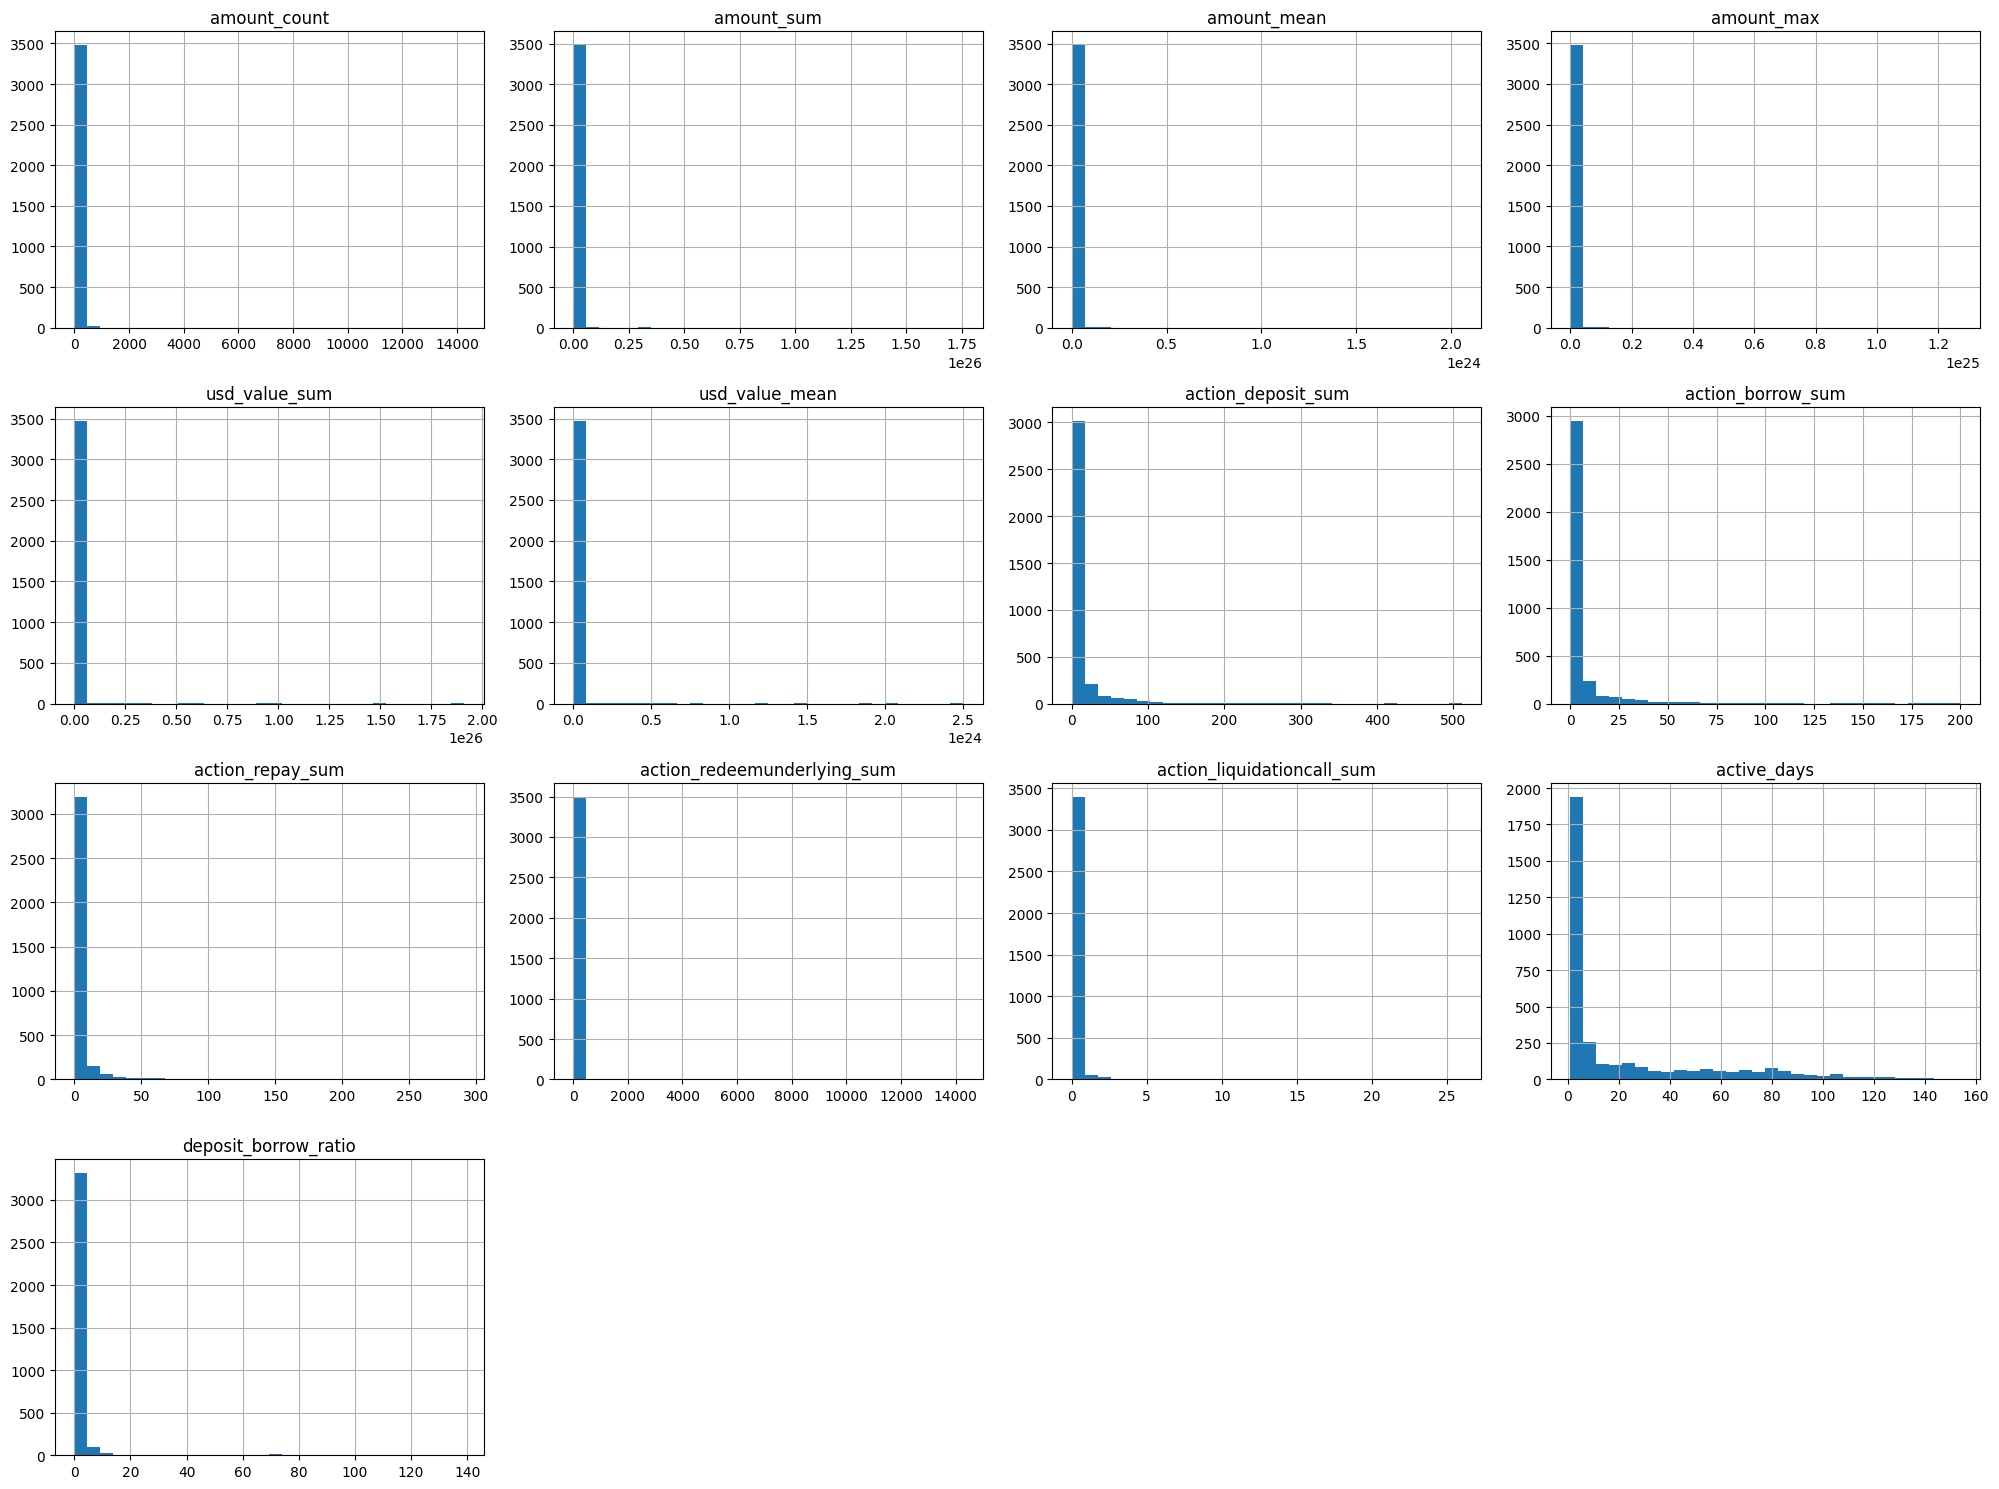

In [7]:
c = df.select_dtypes(include='number').columns
df[c].hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

<Axes: >

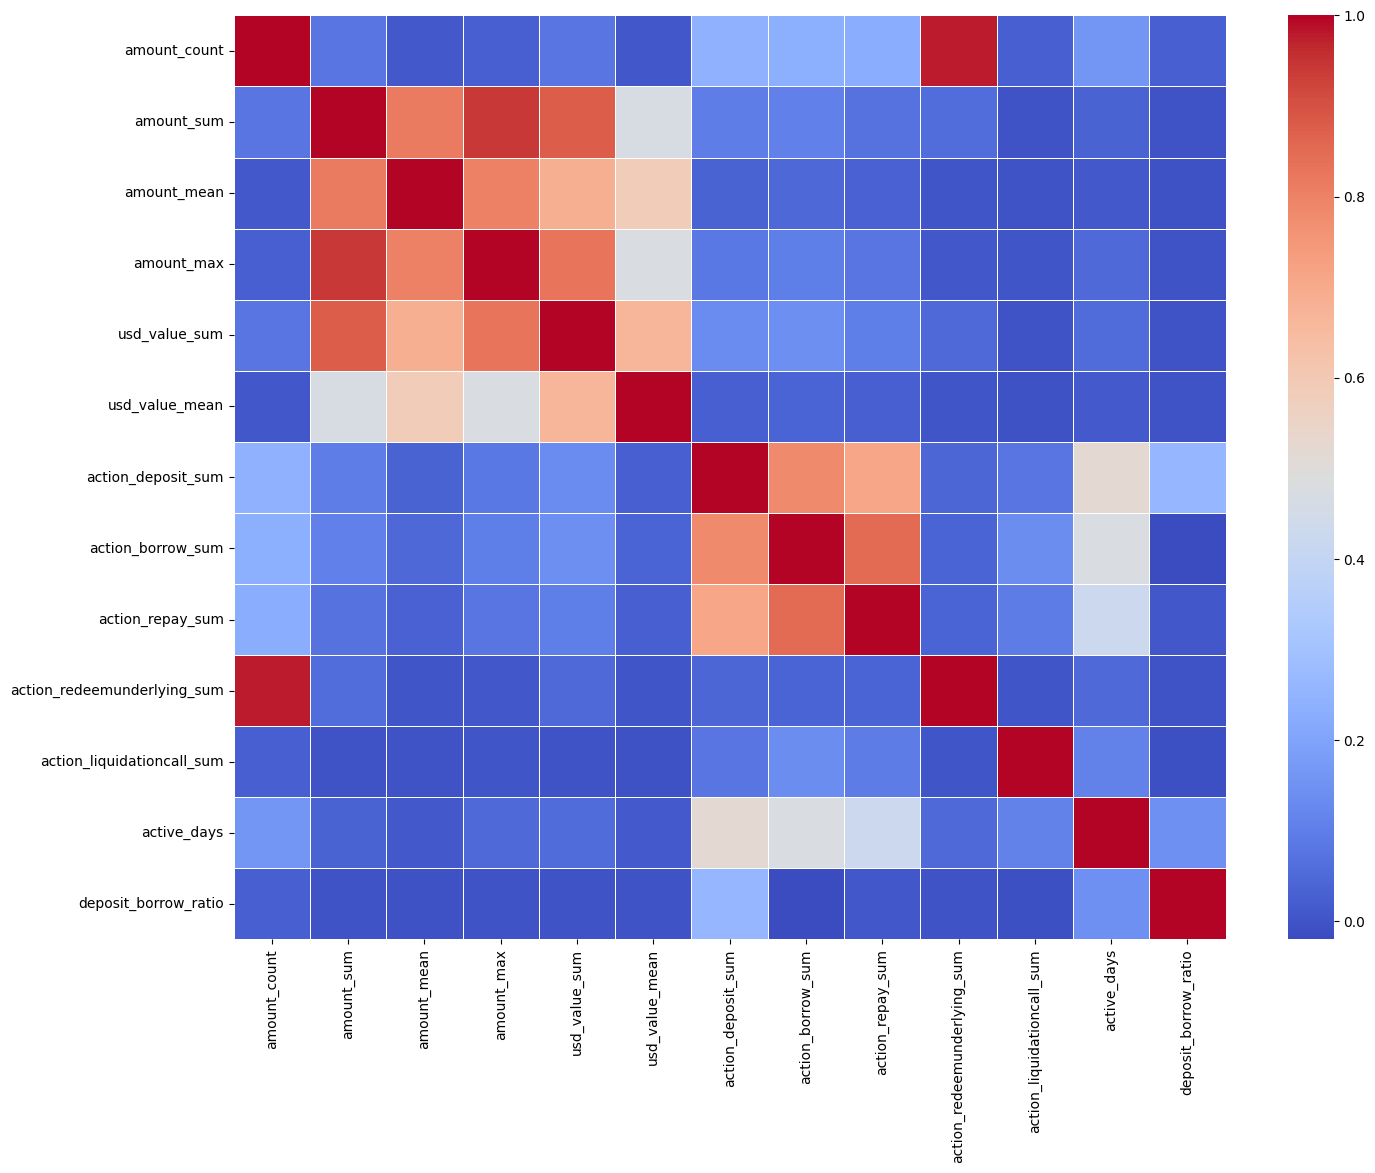

In [8]:
plt.figure(figsize=(16, 12))
sns.heatmap(df[c].corr(), annot=False, cmap="coolwarm", linewidths=0.5)

In [9]:
df = pd.read_csv("../data/features_with_score.csv")

<Axes: xlabel='score', ylabel='Count'>

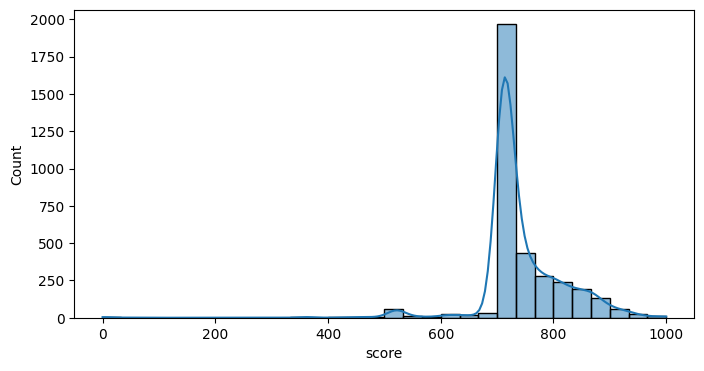

In [10]:
plt.figure(figsize=(8, 4))
sns.histplot(df['score'], bins=30, kde=True)

In [11]:
s = df.select_dtypes(include='number').columns

In [12]:
corr_score = df[s].corr()['score'].sort_values(ascending=False)
corr_score.head(10)

score                   1.000000
active_days             0.600087
action_deposit_sum      0.388802
action_repay_sum        0.307537
deposit_borrow_ratio    0.290531
action_borrow_sum       0.259960
amount_count            0.113798
usd_value_sum           0.064129
amount_max              0.049544
amount_sum              0.042420
Name: score, dtype: float64

<Axes: >

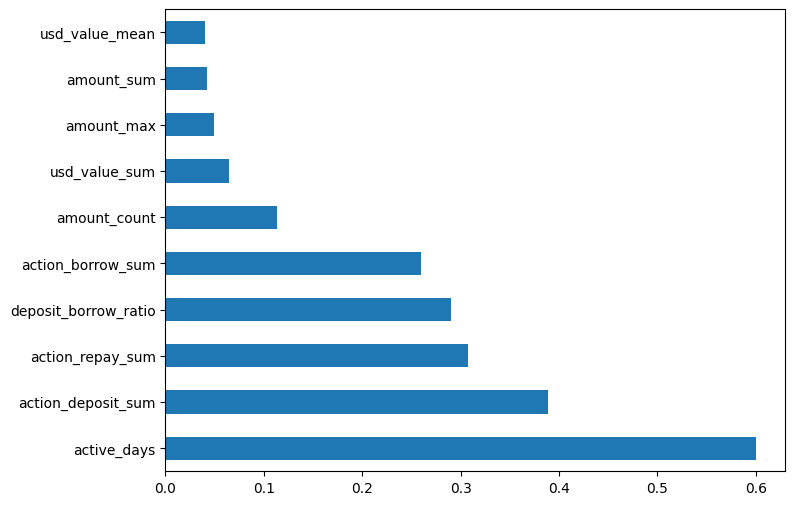

In [13]:
plt.figure(figsize=(8, 6))
corr_score.drop('score').head(10).plot(kind='barh')

<Axes: >

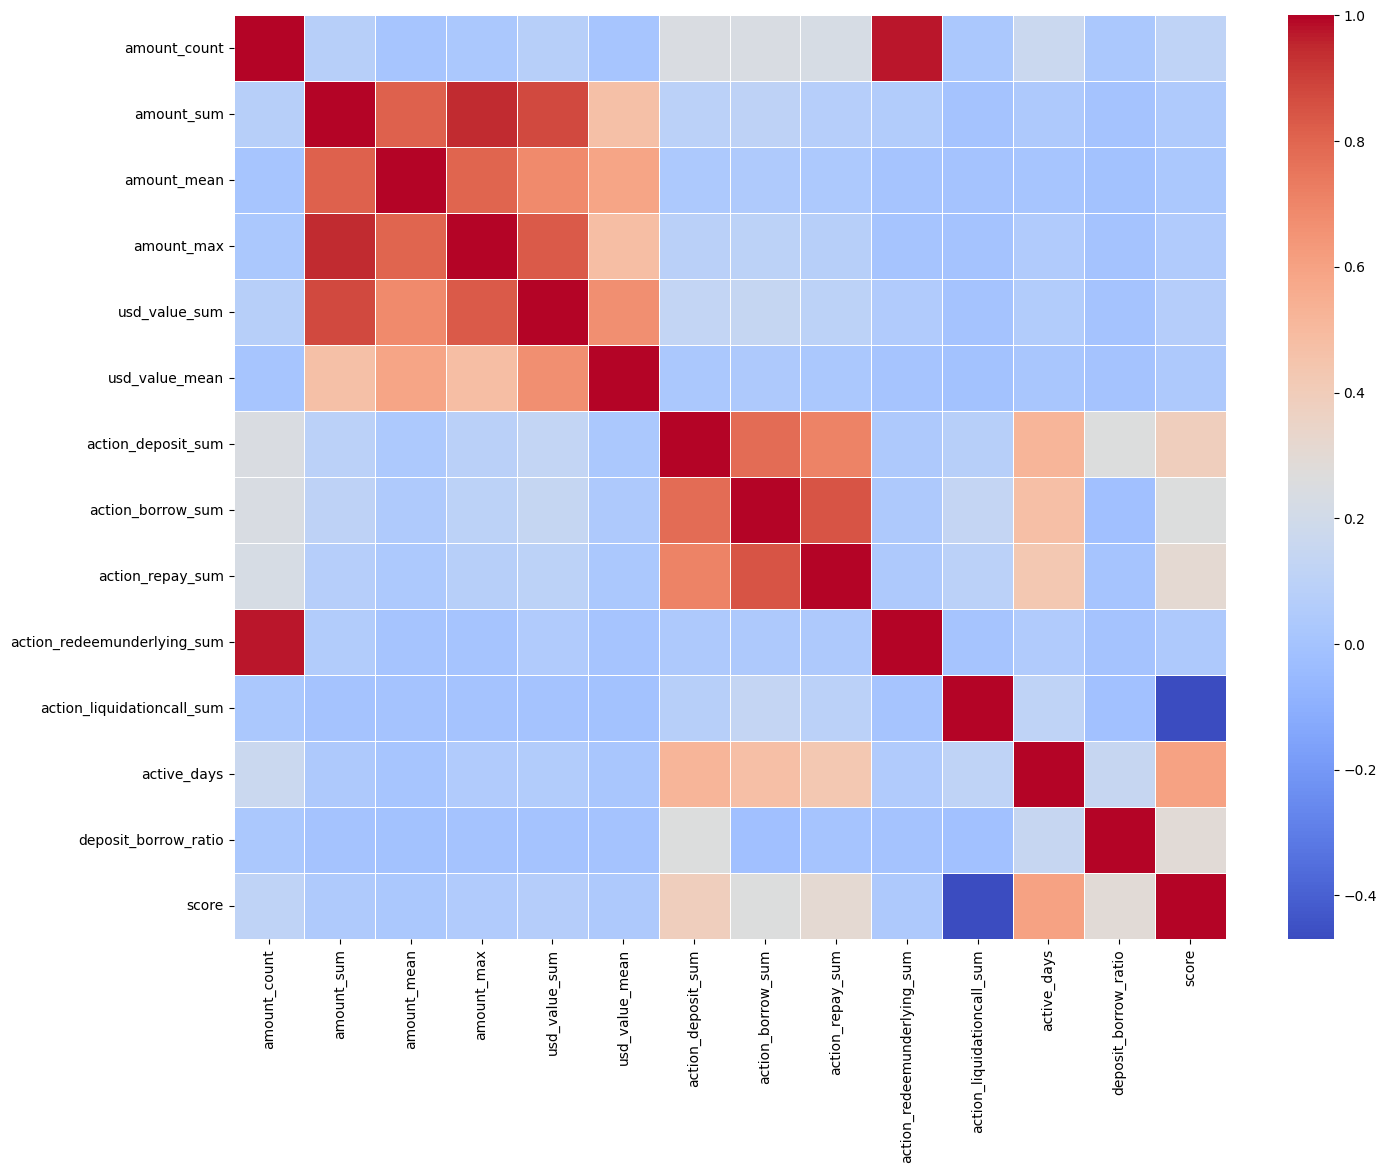

In [14]:
plt.figure(figsize=(16, 12))
sns.heatmap(df[s].corr(), annot=False, cmap="coolwarm", linewidths=0.5)

Text(0.5, 1.0, 'Deposit/Borrow Ratio vs Credit Score')

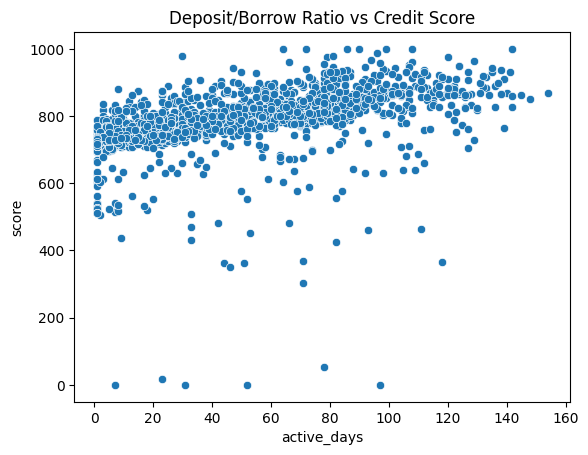

In [19]:
sns.scatterplot(data=df, x='active_days', y='score')
plt.title("Deposit/Borrow Ratio vs Credit Score")



In [20]:
low_score_wallets = df[df['score'] < 200]
low_score_wallets


,userWallet,amount_count,amount_sum,amount_mean,amount_max,usd_value_sum,usd_value_mean,datetime_min,datetime_max,action_deposit_sum,action_borrow_sum,action_repay_sum,action_redeemunderlying_sum,action_liquidationcall_sum,active_days,deposit_borrow_ratio,score
1399,0x0256b3d533b384fd24bfef8f61491ceea5426b5e,75,3.831305e+22,5.108407e+20,6.055539e+21,6.683258e+22,8.911011e+20,2021-04-30 22:42:29,2021-07-17 00:17:37,31,18,10,8,8,78,1.631579,54.315789
1574,0x02a16f8df2b11b3a0c9f47cc5d705830792e3e6f,366,3.702986e+21,1.011745e+19,1.364219e+20,8.195273e+21,2.239146e+19,2021-07-04 02:50:17,2021-08-24 14:03:34,111,117,78,34,26,52,0.940678,0.000000
1730,0x02eb2ee0867dc3dfaa3862d0cc86984b6aada907,37,4.676026e+21,1.263791e+20,5.491140e+20,9.335780e+21,2.523184e+20,2021-05-18 15:30:16,2021-06-17 19:30:47,12,9,2,4,10,31,1.200000,0.000000
2418,0x04288d0b8bc6298a7cc26f367f42932d71c79d9a,33,1.015707e+21,3.077899e+19,5.990922e+20,7.025461e+21,2.128928e+20,2021-05-06 18:58:12,2021-08-11 08:52:16,11,9,0,2,11,97,1.100000,0.000000
2473,0x04426a58fdd02eb166b7c1a84ef390c4987ae1e0,93,1.093296e+22,1.175587e+20,1.780000e+21,2.165380e+22,2.328365e+20,2021-06-02 00:16:24,2021-06-08 11:24:51,17,31,9,19,17,7,0.531250,0.000000
2936,0x051ba1cf67593ea9e697a1039c549cc94660c4b2,24,2.263210e+22,9.430042e+20,1.100000e+22,1.429152e+22,5.954799e+20,2021-04-26 23:45:47,2021-05-19 08:10:43,9,8,0,0,7,23,1.000000,17.000000


In [21]:
df[df["score"] == 1000]

,userWallet,amount_count,amount_sum,amount_mean,amount_max,usd_value_sum,usd_value_mean,datetime_min,datetime_max,action_deposit_sum,action_borrow_sum,action_repay_sum,action_redeemunderlying_sum,action_liquidationcall_sum,active_days,deposit_borrow_ratio,score
230,0x0057bd83a142da84b6404616c683e21e7dd6fa5f,45,7.463321e+20,1.658516e+19,4.500000e+20,8.068254e+20,1.792945e+19,2021-06-13 10:42:47,2021-08-23 19:08:37,20,3,19,3,0,72,5.000000,1000.0
1057,0x01b8f7ef9c12841ca94ee6652f0d5e9646a1168f,180,1.044521e+22,5.802894e+19,5.980260e+21,3.500551e+22,1.944750e+20,2021-05-26 19:09:23,2021-09-01 21:03:44,110,1,65,4,0,99,55.000000,1000.0
1090,0x01cb1826cd50f7f15626a1283ae812ad0a273388,188,4.667220e+20,2.482564e+18,4.881548e+19,3.464474e+22,1.842805e+20,2021-07-01 03:17:57,2021-09-02 13:27:47,94,8,61,25,0,64,10.444444,1000.0
1602,0x02aee0ce756fa0157294ff3ff48c1dd02adccf04,116,2.124776e+23,1.831704e+21,2.450271e+22,5.482145e+23,4.725987e+21,2021-04-13 15:59:03,2021-09-02 01:00:53,73,10,15,18,0,142,6.636364,1000.0
1642,0x02bee0a17903cc1f2f48b4514ec23aae547fe4a3,71,3.757680e+21,5.292507e+19,1.203511e+21,4.031002e+21,5.677467e+19,2021-05-14 15:18:34,2021-08-29 17:21:27,42,5,12,12,0,108,7.000000,1000.0
1706,0x02e07cc7e01b1ca69c0a6de55bfd9b99a8f0af3a,49,2.169830e+20,4.428225e+18,2.498254e+19,1.506260e+23,3.073999e+21,2021-05-26 14:29:26,2021-08-20 07:19:19,20,2,19,8,0,86,6.666667,1000.0
2439,0x0430605323465e26dc21fbaaa9a1a4be6ae9d496,323,2.462383e+21,7.623476e+18,6.858990e+20,1.685873e+22,5.219420e+19,2021-06-03 03:54:56,2021-08-31 05:11:38,220,15,84,4,0,90,13.750000,1000.0


<Axes: ylabel='score'>

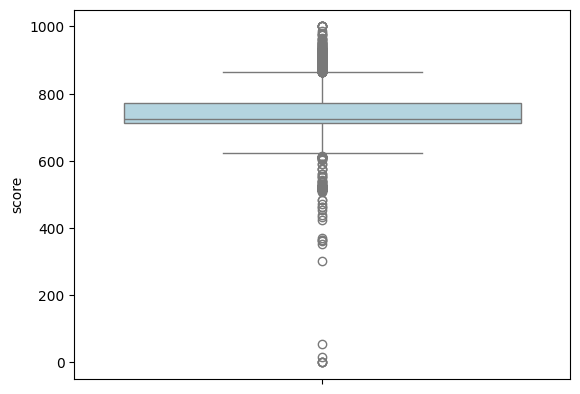

In [22]:
sns.boxplot(data=df['score'], color='lightblue')

In [ ]:
df

,userWallet,amount_count,amount_sum,amount_mean,amount_max,usd_value_sum,usd_value_mean,datetime_min,datetime_max,action_deposit_sum,action_borrow_sum,action_repay_sum,action_redeemunderlying_sum,action_liquidationcall_sum,active_days,deposit_borrow_ratio,score
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,1,2.000000e+09,2.000000e+09,2.000000e+09,1.987664e+09,1.987664e+09,2021-08-17 05:29:26,2021-08-17 05:29:26,1,0,0,0,0,1,1.000000,712.000000
1,0x000000000051d07a4fb3bd10121a343d85818da6,1,1.450000e+20,1.450000e+20,1.450000e+20,2.856945e+20,2.856945e+20,2021-05-20 15:36:53,2021-05-20 15:36:53,1,0,0,0,0,1,1.000000,712.000000
2,0x000000000096026fb41fc39f9875d164bd82e2dc,2,5.000000e+15,2.500000e+15,4.000000e+15,5.152311e+15,2.576155e+15,2021-07-24 09:28:33,2021-07-31 23:15:18,2,0,0,0,0,8,2.000000,730.000000
3,0x0000000000e189dd664b9ab08a33c4839953852c,17,4.835297e+18,2.844292e+17,4.489247e+18,9.803600e+20,5.766824e+19,2021-04-19 15:23:17,2021-08-26 23:15:16,0,0,0,17,0,130,0.000000,817.000000
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,399,1.735192e+23,4.348853e+20,1.600000e+22,3.797495e+23,9.517531e+20,2021-04-21 21:28:30,2021-09-01 18:15:24,250,15,4,130,0,133,15.625000,915.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3492,0x06185db89f5c8ef5e5a0abc95c5cb69b54c33f30,1,9.800000e+01,9.800000e+01,9.800000e+01,9.871628e+01,9.871628e+01,2021-07-12 22:31:43,2021-07-12 22:31:43,1,0,0,0,0,1,1.000000,512.098716
3493,0x06189341e523a52ae10c4bd4a7774371fac1b249,7,1.697882e+19,2.425546e+18,6.064412e+18,2.114572e+19,3.020817e+18,2021-05-30 07:22:19,2021-05-30 14:02:49,4,1,0,2,0,1,2.000000,723.000000
3494,0x0618c450370822c5cb25ec143a3008230d8e2c12,5,7.101535e+21,1.420307e+21,7.073324e+21,7.829964e+22,1.565993e+22,2021-05-20 03:52:58,2021-05-20 04:08:15,1,0,0,4,0,1,1.000000,716.000000
3495,0x0618e615c8c9b5efc8c8eadc68be7182bdc455e2,22,2.516332e+21,1.143787e+20,5.000000e+20,7.585885e+21,3.448130e+20,2021-06-10 22:09:52,2021-07-11 23:44:47,13,2,2,5,0,32,4.333333,807.333333


Score Range Distribution:
score_range
0–100          6
100–200        0
200–300        0
300–400        6
400–500        9
500–600       72
600–700       67
700–800     2679
800–900      565
900–1000      86
Name: count, dtype: int64


C:\Users\rishe\AppData\Local\Temp\ipykernel_111540\1806122441.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=range_counts.index, y=range_counts.values, palette="magma")


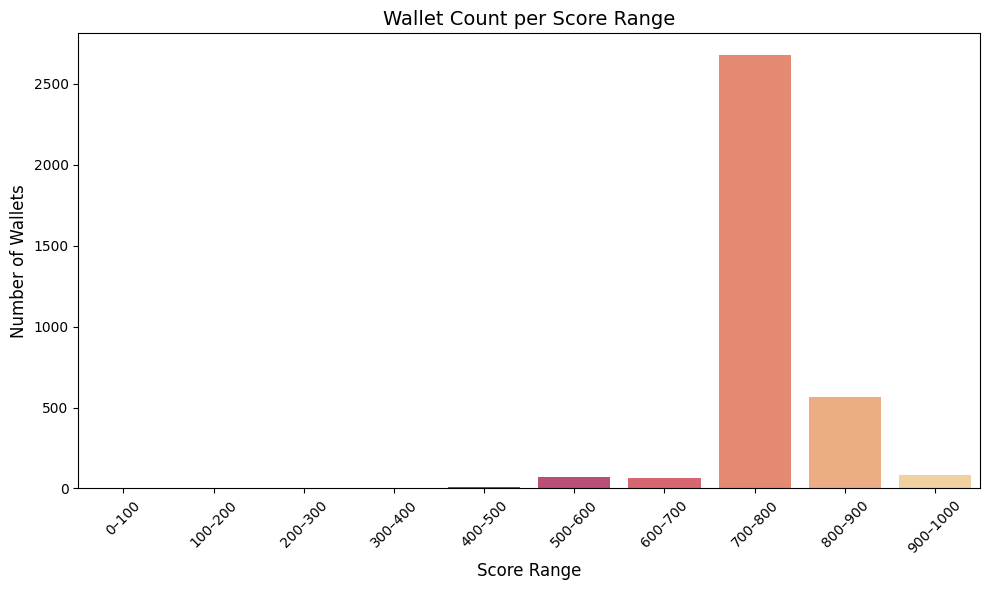

In [25]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
labels = ["0–100", "100–200", "200–300", "300–400", "400–500",
          "500–600", "600–700", "700–800", "800–900", "900–1000"]

df['score_range'] = pd.cut(df['score'], bins=bins, labels=labels, include_lowest=True, right=False)

# Count number of wallets in each score range
range_counts = df['score_range'].value_counts().sort_index()

# Print distribution table
print("Score Range Distribution:")
print(range_counts)

# Plot the score distribution as a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=range_counts.index, y=range_counts.values, palette="magma")
plt.title("Wallet Count per Score Range", fontsize=14)
plt.xlabel("Score Range", fontsize=12)
plt.ylabel("Number of Wallets", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()